In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv("PakistanSuicideAttacks Ver 6 (10-October-2017).csv", encoding="latin1")

In [2]:
data.head(5)

,S#,Date,Islamic Date,Blast Day Type,Holiday Type,Time,City,Latitude,Longitude,Province,...,Targeted Sect if any,Killed Min,Killed Max,Injured Min,Injured Max,No. of Suicide Blasts,Explosive Weight (max),Hospital Names,Temperature(C),Temperature(F)
0,1,Sunday-November 19-1995,25 Jumaada al-THaany 1416 A.H,Holiday,Weekend,NaN,Islamabad,33.7180,73.0718,Capital,...,None,14.0,15.0,NaN,60,2.0,NaN,NaN,15.835,60.503
1,2,Monday-November 6-2000,10 SHa`baan 1421 A.H,Working Day,NaN,NaN,Karachi,24.9918,66.9911,Sindh,...,None,NaN,3.0,NaN,3,1.0,NaN,NaN,23.770,74.786
2,3,Wednesday-May 8-2002,25 safar 1423 A.H,Working Day,NaN,7:45 AM,Karachi,24.9918,66.9911,Sindh,...,Christian,13.0,15.0,20.0,40,1.0,2.5 Kg,1.Jinnah Postgraduate Medical Center 2. Civil ...,31.460,88.628
3,4,Friday-June 14-2002,3 Raby` al-THaany 1423 A.H,Working Day,NaN,11:10:00 AM,Karachi,24.9918,66.9911,Sindh,...,Christian,NaN,12.0,NaN,51,1.0,NaN,NaN,31.430,88.574
4,5,Friday-July 4-2003,4 Jumaada al-awal 1424 A.H,Working Day,NaN,NaN,Quetta,30.2095,67.0182,Baluchistan,...,Shiite,44.0,47.0,NaN,65,1.0,NaN,1.CMH Quetta \n2.Civil Hospital 3. Boland Medi...,33.120,91.616


In [3]:
data.drop("S#",inplace=True,axis=1)

In [4]:
data.describe()

,Latitude,Killed Min,Killed Max,Injured Min,No. of Suicide Blasts,Temperature(C),Temperature(F)
count,490.000000,346.000000,476.00000,361.000000,410.000000,487.000000,485.000000
mean,32.621874,14.855491,15.30042,31.601108,1.117073,21.075554,69.906373
std,2.477845,17.659154,20.32867,38.762832,0.396749,8.390859,15.108953
min,24.879503,0.000000,0.00000,0.000000,1.000000,-2.370000,27.734000
25%,31.823800,3.000000,3.00000,7.000000,1.000000,14.617500,58.253000
50%,33.583300,8.000000,8.00000,20.000000,1.000000,21.295000,70.331000
75%,34.004300,20.750000,19.00000,40.000000,1.000000,28.115000,82.499000
max,35.383300,125.000000,148.00000,320.000000,4.000000,44.000000,111.000000


In [5]:
data.columns

Index(['Date', 'Islamic Date', 'Blast Day Type', 'Holiday Type', 'Time',
       'City', 'Latitude', 'Longitude', 'Province', 'Location',
       'Location Category', 'Location Sensitivity', 'Open/Closed Space',
       'Influencing Event/Event', 'Target Type', 'Targeted Sect if any',
       'Killed Min', 'Killed Max', 'Injured Min', 'Injured Max',
       'No. of Suicide Blasts', 'Explosive Weight (max)', 'Hospital Names',
       'Temperature(C)', 'Temperature(F)'],
      dtype='object')

In [6]:
# Lets see the missing values and their percentage
total=data.isnull().sum().sort_values(ascending=False)
percentage=(data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percentage],axis=1,keys=["Total","Percentage"])
missing_data

,Total,Percentage
Holiday Type,420,0.853659
Explosive Weight (max),323,0.656504
Influencing Event/Event,305,0.619919
Time,211,0.428862
Hospital Names,198,0.402439
Islamic Date,156,0.317073
Killed Min,146,0.296748
Injured Min,131,0.266260
No. of Suicide Blasts,82,0.166667
Targeted Sect if any,49,0.099593


In [7]:
#Creating a new column Date which contain dates without -
data["Date"]=data["Date"].str.replace("-"," ")
data.head()

,Date,Islamic Date,Blast Day Type,Holiday Type,Time,City,Latitude,Longitude,Province,Location,...,Targeted Sect if any,Killed Min,Killed Max,Injured Min,Injured Max,No. of Suicide Blasts,Explosive Weight (max),Hospital Names,Temperature(C),Temperature(F)
0,Sunday November 19 1995,25 Jumaada al-THaany 1416 A.H,Holiday,Weekend,NaN,Islamabad,33.7180,73.0718,Capital,Egyptian Embassy,...,None,14.0,15.0,NaN,60,2.0,NaN,NaN,15.835,60.503
1,Monday November 6 2000,10 SHa`baan 1421 A.H,Working Day,NaN,NaN,Karachi,24.9918,66.9911,Sindh,office of Nawa-e-Waqt,...,None,NaN,3.0,NaN,3,1.0,NaN,NaN,23.770,74.786
2,Wednesday May 8 2002,25 safar 1423 A.H,Working Day,NaN,7:45 AM,Karachi,24.9918,66.9911,Sindh,Pakistan Navy bus Parked outside Five Star She...,...,Christian,13.0,15.0,20.0,40,1.0,2.5 Kg,1.Jinnah Postgraduate Medical Center 2. Civil ...,31.460,88.628
3,Friday June 14 2002,3 Raby` al-THaany 1423 A.H,Working Day,NaN,11:10:00 AM,Karachi,24.9918,66.9911,Sindh,US Consulate Civil Lines Area,...,Christian,NaN,12.0,NaN,51,1.0,NaN,NaN,31.430,88.574
4,Friday July 4 2003,4 Jumaada al-awal 1424 A.H,Working Day,NaN,NaN,Quetta,30.2095,67.0182,Baluchistan,Imambargah MeCongy Road Quetta,...,Shiite,44.0,47.0,NaN,65,1.0,NaN,1.CMH Quetta \n2.Civil Hospital 3. Boland Medi...,33.120,91.616


In [8]:
#Lets seperate day month and year from date
day_name=data.Date.str.split(' ').str[0]
month=data.Date.str.split(' ').str[1]
day=data.Date.str.split(' ').str[2]
year=data.Date.str.split(" ").str[3]
data["Day_name"]=day_name
data["Month"]=month
data["Day"]=day
data["Year"]=year
data.head()

,Date,Islamic Date,Blast Day Type,Holiday Type,Time,City,Latitude,Longitude,Province,Location,...,Injured Max,No. of Suicide Blasts,Explosive Weight (max),Hospital Names,Temperature(C),Temperature(F),Day_name,Month,Day,Year
0,Sunday November 19 1995,25 Jumaada al-THaany 1416 A.H,Holiday,Weekend,NaN,Islamabad,33.7180,73.0718,Capital,Egyptian Embassy,...,60,2.0,NaN,NaN,15.835,60.503,Sunday,November,19,1995
1,Monday November 6 2000,10 SHa`baan 1421 A.H,Working Day,NaN,NaN,Karachi,24.9918,66.9911,Sindh,office of Nawa-e-Waqt,...,3,1.0,NaN,NaN,23.770,74.786,Monday,November,6,2000
2,Wednesday May 8 2002,25 safar 1423 A.H,Working Day,NaN,7:45 AM,Karachi,24.9918,66.9911,Sindh,Pakistan Navy bus Parked outside Five Star She...,...,40,1.0,2.5 Kg,1.Jinnah Postgraduate Medical Center 2. Civil ...,31.460,88.628,Wednesday,May,8,2002
3,Friday June 14 2002,3 Raby` al-THaany 1423 A.H,Working Day,NaN,11:10:00 AM,Karachi,24.9918,66.9911,Sindh,US Consulate Civil Lines Area,...,51,1.0,NaN,NaN,31.430,88.574,Friday,June,14,2002
4,Friday July 4 2003,4 Jumaada al-awal 1424 A.H,Working Day,NaN,NaN,Quetta,30.2095,67.0182,Baluchistan,Imambargah MeCongy Road Quetta,...,65,1.0,NaN,1.CMH Quetta \n2.Civil Hospital 3. Boland Medi...,33.120,91.616,Friday,July,4,2003


In [9]:
data["Islamic Date"]=data["Islamic Date"].str.replace(" al","-al")
data.head()

,Date,Islamic Date,Blast Day Type,Holiday Type,Time,City,Latitude,Longitude,Province,Location,...,Injured Max,No. of Suicide Blasts,Explosive Weight (max),Hospital Names,Temperature(C),Temperature(F),Day_name,Month,Day,Year
0,Sunday November 19 1995,25 Jumaada-al-THaany 1416 A.H,Holiday,Weekend,NaN,Islamabad,33.7180,73.0718,Capital,Egyptian Embassy,...,60,2.0,NaN,NaN,15.835,60.503,Sunday,November,19,1995
1,Monday November 6 2000,10 SHa`baan 1421 A.H,Working Day,NaN,NaN,Karachi,24.9918,66.9911,Sindh,office of Nawa-e-Waqt,...,3,1.0,NaN,NaN,23.770,74.786,Monday,November,6,2000
2,Wednesday May 8 2002,25 safar 1423 A.H,Working Day,NaN,7:45 AM,Karachi,24.9918,66.9911,Sindh,Pakistan Navy bus Parked outside Five Star She...,...,40,1.0,2.5 Kg,1.Jinnah Postgraduate Medical Center 2. Civil ...,31.460,88.628,Wednesday,May,8,2002
3,Friday June 14 2002,3 Raby`-al-THaany 1423 A.H,Working Day,NaN,11:10:00 AM,Karachi,24.9918,66.9911,Sindh,US Consulate Civil Lines Area,...,51,1.0,NaN,NaN,31.430,88.574,Friday,June,14,2002
4,Friday July 4 2003,4 Jumaada-al-awal 1424 A.H,Working Day,NaN,NaN,Quetta,30.2095,67.0182,Baluchistan,Imambargah MeCongy Road Quetta,...,65,1.0,NaN,1.CMH Quetta \n2.Civil Hospital 3. Boland Medi...,33.120,91.616,Friday,July,4,2003


In [10]:
#Lets seperate day month and year from Islamic date
day=data["Islamic Date"].str.split(' ').str[0]
month=data["Islamic Date"].str.split(' ').str[1]
year=data["Islamic Date"].str.split(' ').str[2]
data["Islamic_Day"]=day
data["Islamic_Month"]=month
data["Islamic_Year"]=year
data.drop("Islamic Date",axis=1,inplace=True)

data.drop("Date",axis=1,inplace=True)

In [11]:
data["Injured Max"].dtypes

dtype('O')

In [12]:
data["Injured Max"]=data["Injured Max"].convert_objects(convert_numeric=True)
data["Injured Max"].dtypes

C:\Users\Hussnain\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


dtype('float64')

C:\Users\Hussnain\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Hussnain\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Hussnain\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Hussnain\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has

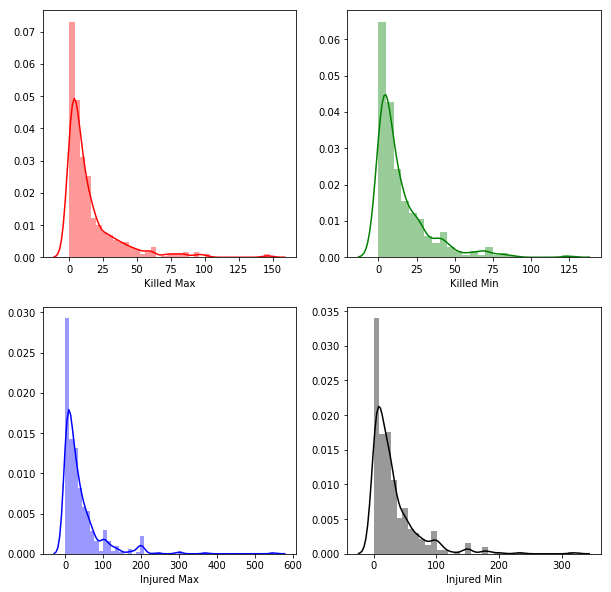

In [13]:
#Lets see the distribution of killed max,killed min ,Injured max and Injured min
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(data["Killed Max"].dropna(),color="r")
plt.subplot(2,2,2)
sns.distplot(data["Killed Min"].dropna(),color="g")
plt.subplot(2,2,3)
sns.distplot(data["Injured Max"].dropna(),color="b")
plt.subplot(2,2,4)
sns.distplot(data["Injured Min"].dropna(),color="black");

**imputing the missing values by random values between (mean-standard deviation) and (mean+standard deviation) **

In [14]:
mean_killed_max=data["Killed Max"].mean()
std_killed_max=data["Killed Max"].std()
null_killed_max=data["Killed Max"].isnull().sum()
rand1=np.random.randint(mean_killed_max-std_killed_max,mean_killed_max+std_killed_max,size=null_killed_max)

In [15]:
data["Killed Max"][np.isnan(data["Killed Max"])]=rand1
data["Killed Max"].isnull().sum();

C:\Users\Hussnain\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
mean_killed_min=data["Killed Min"].mean()
std_killed_min=data["Killed Min"].std()
null_killed_min=data["Killed Min"].isnull().sum()
rand2=np.random.randint(mean_killed_min-std_killed_min,mean_killed_min+std_killed_min,size=null_killed_min)

In [17]:
data["Killed Min"][np.isnan(data["Killed Min"])]=rand2
data["Killed Min"].isnull().sum();

C:\Users\Hussnain\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
mean_Injured_max=data["Injured Max"].mean()
std_Injured_max=data["Injured Max"].std()
null_Injured_max=data["Injured Max"].isnull().sum()
rand3=np.random.randint(mean_Injured_max-std_Injured_max,mean_Injured_max+std_Injured_max,size=null_Injured_max)

In [19]:
data["Injured Max"][np.isnan(data["Injured Max"])]=rand3
data["Injured Max"].isnull().sum()

C:\Users\Hussnain\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0

In [20]:
mean_Injured_min=data["Injured Min"].mean()
std_Injured_min=data["Injured Min"].std()
null_Injured_min=data["Injured Min"].isnull().sum()
rand4=np.random.randint(mean_Injured_min-std_Injured_min,mean_Injured_min+std_Injured_min,size=null_Injured_min)

In [21]:
data["Injured Min"][np.isnan(data["Injured Min"])]=rand4
data["Injured Min"].isnull().sum();

C:\Users\Hussnain\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


**Histogram of No of suicide blasts**

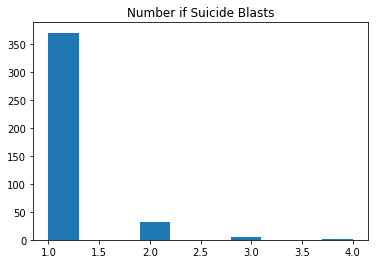

In [22]:
plt.title("Number if Suicide Blasts")
plt.hist(data["No. of Suicide Blasts"].dropna());

In [23]:
#Filling the missing values No. of Suicide Blasts with 1
data["No. of Suicide Blasts"]=data["No. of Suicide Blasts"].fillna("1")

In [24]:
#Calculating average people killed and average people injured
data["Killed Avg"]=(data["Killed Max"]+data["Killed Min"])/2
data["Injured Avg"]=(data["Injured Max"]+data["Injured Min"]/2)

In [25]:
data["Location Sensitivity"]=data["Location Sensitivity"].str.replace("low","Low")

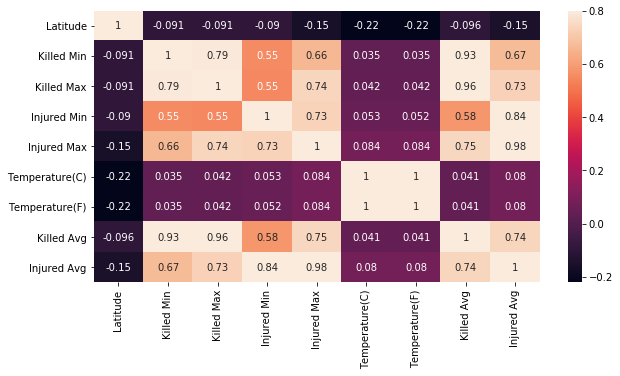

In [26]:
#lets draw a heatmap to get some insights
plt.figure(figsize=(10,5))
corr=data.corr()
sns.heatmap(corr,vmax=0.8,annot=True);

**How many people got killed and injured per year?**

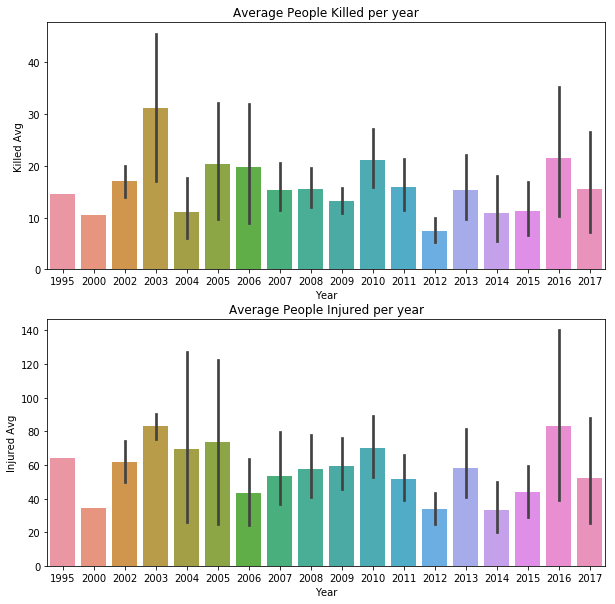

In [27]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title("Average People Killed per year")
sns.barplot("Year","Killed Avg",data=data)
plt.subplot(2,1,2)
plt.title("Average People Injured per year")
sns.barplot("Year","Injured Avg",data=data);


**correlation with suicide bombing attacks with influencing events given in the dataset**

In [28]:
cleaned_influencing=data[pd.notnull(data["Influencing Event/Event"])]
cleaned_influencing[["Influencing Event/Event","Killed Avg"]].groupby("Influencing Event/Event",as_index=False).mean().sort_values(by="Killed Avg",ascending=False)    

,Influencing Event/Event,Killed Avg
94,Rally ppp,135.0
45,FC personnel were gathered there,88.5
123,Two suicide attackers blew themselves up outsi...,79.5
30,Attack on shia community,71.0
120,The fatalities were mainly advocates,70.0
24,"Attack on Police Training Center, Saryab Road,...",59.5
10,Al-Quds Rally organized by Imamia stdents orga...,58.0
110,Suicide bombers targeting the capital of Baloc...,57.5
39,Eid Miladun Nabi,52.0
18,Attack on Dargah Shah Noorani in Khuzdar district,48.5


In [29]:
#Correlation with Influencing events with average people injured
cleaned_influencing[["Influencing Event/Event","Injured Avg"]].groupby(["Influencing Event/Event"],as_index=False).mean().sort_values(by="Injured Avg",ascending=False)      

,Influencing Event/Event,Injured Avg
94,Rally ppp,600.0
126,Yaum-e-Ali,318.0
30,Attack on shia community,275.0
52,Funeral Procession of\nImambargah Caretaker,275.0
10,Al-Quds Rally organized by Imamia stdents orga...,275.0
49,Friday prayer was in progress,248.0
24,"Attack on Police Training Center, Saryab Road,...",215.0
45,FC personnel were gathered there,204.0
72,Masjid,196.5
123,Two suicide attackers blew themselves up outsi...,195.0


**correlation between blast/explosive weight and number of people killed and injured**

In [30]:
data["Explosive Weight (max)"]=data["Explosive Weight (max)"].str.replace("kg"," kg")
data["Explosive Weight (max)"]=data["Explosive Weight (max)"].str.replace("KG"," kg")
#correlation between blast/explosive weight and number of people killed and injured
data["Explosive Weight (max)"]=data["Explosive Weight (max)"].str.split(" ").str[0]
data["Explosive Weight (max)"]=data["Explosive Weight (max)"].str.split("-").str[0]
data["Explosive Weight (max)"]=data["Explosive Weight (max)"].convert_objects(convert_numeric=True)

C:\Users\Hussnain\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


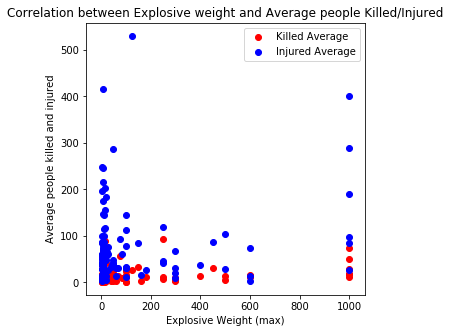

In [31]:
plt.figure(figsize=(5,5))
plt.xlabel("Explosive Weight (max)")
plt.ylabel("Average people killed and injured")
plt.title("Correlation between Explosive weight and Average people Killed/Injured")
plt.scatter("Explosive Weight (max)","Killed Avg",data=data,label="Killed Average",color="r")
plt.scatter("Explosive Weight (max)","Injured Avg",data=data,label="Injured Average",color="b")
plt.legend(loc="upper right");

**Impact of holiday type on number of blast victims**

In [32]:
W=data["Holiday Type"]=="Weekend"
P=data["Holiday Type"]=="Pakistan Day"
L=data["Holiday Type"]=="Labour Day"
I=data["Holiday Type"]=="Iqbal Day"
EF=data["Holiday Type"]=="Eid-ul-Fitar"
EN=data["Holiday Type"]=="Eid Milad un-Nabi"
A=data["Holiday Type"]=="Ashura"

In [33]:
weekend=data[W]
pakistan_day=data[P]
labour_day=data[L]
iqbal_day=data[I]
eid_ul_fitar=data[W]
eid_milad_un_nabi=data[EN]
ashura=data[A]

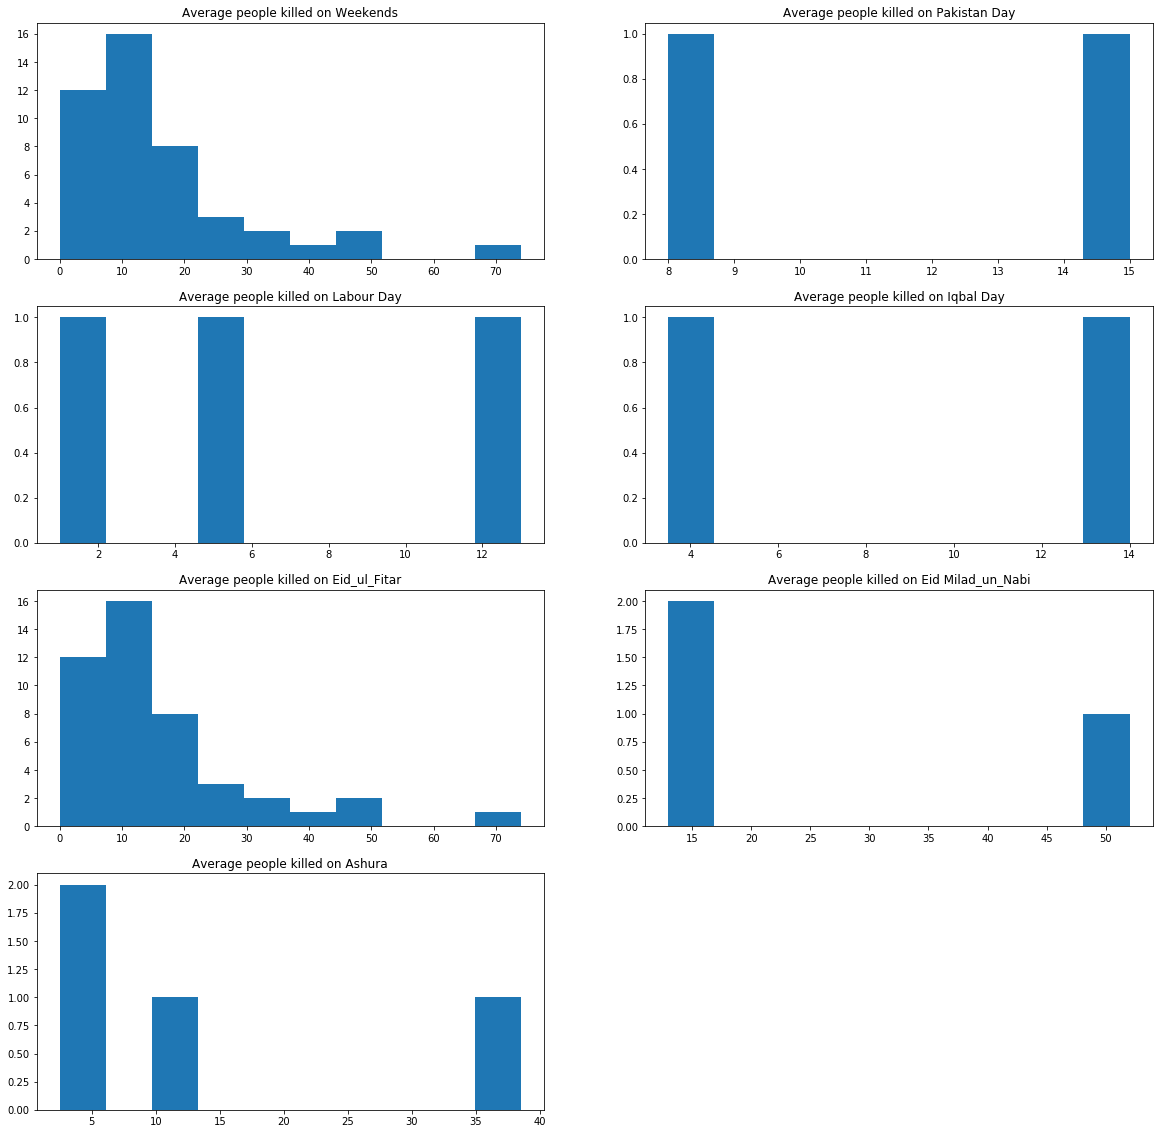

In [34]:
#Average people killed on different holiday types
plt.figure(figsize=(20,20))
plt.subplot(4,2,1)
plt.title("Average people killed on Weekends")
plt.hist(weekend["Killed Avg"])
plt.subplot(4,2,2)
plt.title("Average people killed on Pakistan Day")
plt.hist(pakistan_day["Killed Avg"])
plt.subplot(4,2,3)
plt.title("Average people killed on Labour Day")
plt.hist(labour_day["Killed Avg"])
plt.subplot(4,2,4)
plt.title("Average people killed on Iqbal Day")
plt.hist(iqbal_day["Killed Avg"])
plt.subplot(4,2,5)
plt.title("Average people killed on Eid_ul_Fitar")
plt.hist(eid_ul_fitar["Killed Avg"])
plt.subplot(4,2,6)
plt.title("Average people killed on Eid Milad_un_Nabi")
plt.hist(eid_milad_un_nabi["Killed Avg"])
plt.subplot(4,2,7)
plt.title("Average people killed on Ashura")
plt.hist(ashura["Killed Avg"]);

(array([1., 0., 0., 1., 0., 0., 0., 1., 0., 1.]),
 array([ 36.5,  46.9,  57.3,  67.7,  78.1,  88.5,  98.9, 109.3, 119.7,
        130.1, 140.5]),
 <a list of 10 Patch objects>)

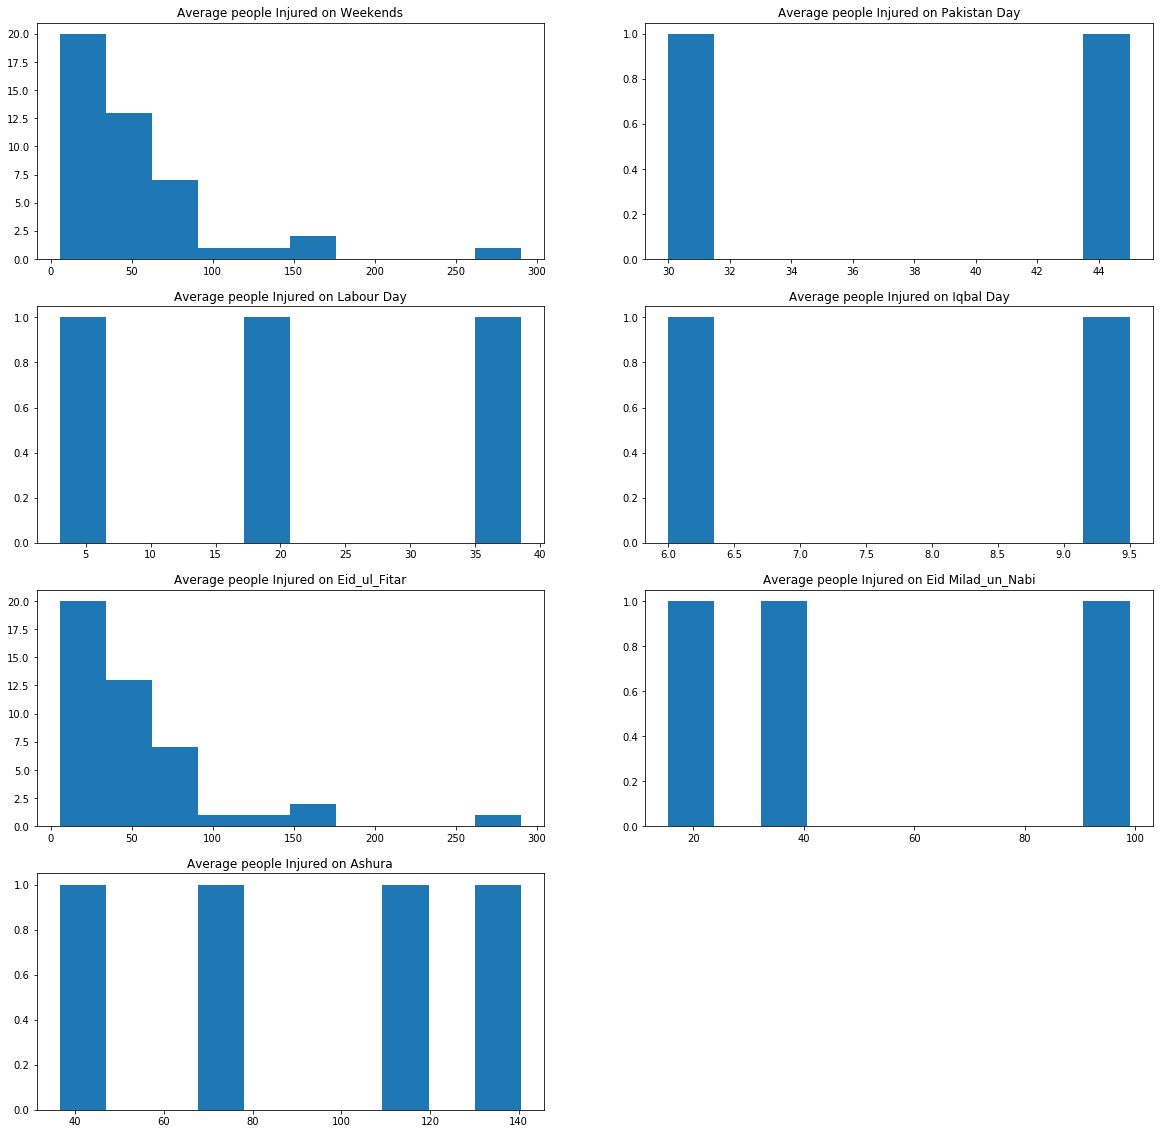

In [35]:
#Average people injured on different holiday types
plt.figure(figsize=(20,20))
plt.subplot(4,2,1)
plt.title("Average people Injured on Weekends")
plt.hist(weekend["Injured Avg"])
plt.subplot(4,2,2)
plt.title("Average people Injured on Pakistan Day")
plt.hist(pakistan_day["Injured Avg"])
plt.subplot(4,2,3)
plt.title("Average people Injured on Labour Day")
plt.hist(labour_day["Injured Avg"])
plt.subplot(4,2,4)
plt.title("Average people Injured on Iqbal Day")
plt.hist(iqbal_day["Injured Avg"])
plt.subplot(4,2,5)
plt.title("Average people Injured on Eid_ul_Fitar")
plt.hist(eid_ul_fitar["Injured Avg"])
plt.subplot(4,2,6)
plt.title("Average people Injured on Eid Milad_un_Nabi")
plt.hist(eid_milad_un_nabi["Injured Avg"])
plt.subplot(4,2,7)
plt.title("Average people Injured on Ashura")
plt.hist(ashura["Injured Avg"])

**correlation between Islamic date and blast day/time/size/number of victims**

In [36]:
data["Islamic_Month"]=data["Islamic_Month"].str.replace("SHawwal","Shawwal")
data["Islamic_Month"]=data["Islamic_Month"].str.replace("Jumada-al-awwal","Jamadi-ul-Awal")
data["Islamic_Month"]=data["Islamic_Month"].str.replace("Jumaada-al-awal","Jamadi-ul-Awal")
data["Islamic_Month"]=data["Islamic_Month"].str.replace("SHa`baan","Shaban")
data["Islamic_Month"]=data["Islamic_Month"].str.replace("Shawwal","Shawaal")
data["Islamic_Month"]=data["Islamic_Month"].str.replace("Thw-al-Qi`dah","Zeqad")
data["Islamic_Month"]=data["Islamic_Month"].str.replace("Thw-al-Hijjah","Zilhaj")

In [37]:
data["Islamic_Month"].unique()

array(['Jumaada-al-THaany', 'Shaban', 'safar', 'Raby`-al-THaany',
       'Jamadi-ul-Awal', 'Zeqad', 'MuHarram', 'Raby`-al-awal', nan,
       'Rajab', 'Shawaal', 'RamaDHaan', 'Zilhaj'], dtype=object)

In [38]:
#correlation between Islamic month and average people killed and average people injured
cleaned_Islamic_Date=data[pd.notnull(data["Islamic_Month"])]
cleaned_Date=data[pd.notnull(data["Month"])]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

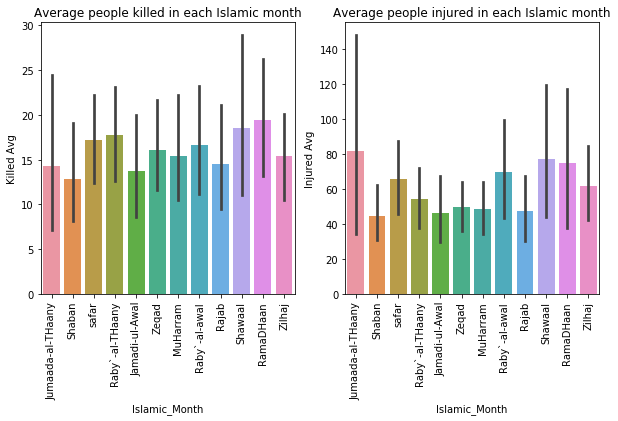

In [39]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Average people killed in each Islamic month")
sns.barplot("Islamic_Month","Killed Avg",data=cleaned_Islamic_Date)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title("Average people injured in each Islamic month")
sns.barplot("Islamic_Month","Injured Avg",data=cleaned_Islamic_Date)
plt.xticks(rotation=90)

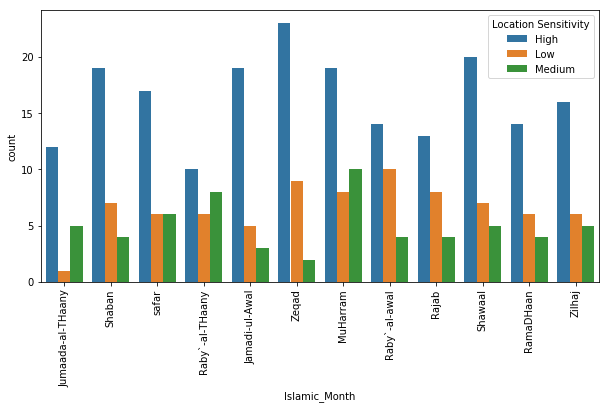

In [40]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot("Islamic_Month",hue="Location Sensitivity",data=cleaned_Islamic_Date);

**Top 10 locations of blasts**

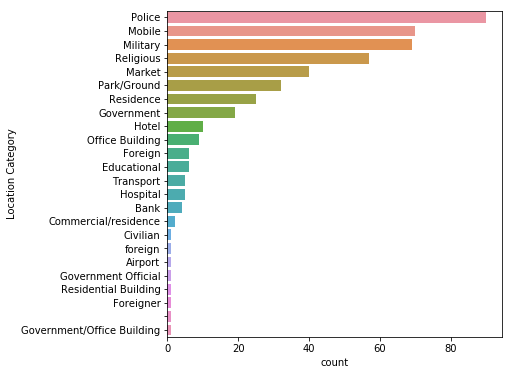

In [41]:
plt.figure(figsize=(6,6))
sns.countplot(y="Location Category",data=data,order=data["Location Category"].value_counts().index)

Most of the blasts which killed and injured people in months oct,dec,jan,feb,march,april and nov had high location senitivity.

**Lets see which month has the highest rate of blasts**

In [42]:
data.Month=data.Month.replace("November","Nov")
data.Month=data.Month.replace("December","Dec")
data.Month=data.Month.replace("February","Feb")
data.Month=data.Month.replace("October","Oct")
data.Month=data.Month.replace("April","Apr")
data.Month=data.Month.replace("March","Mar")
data.Month=data.Month.replace("August","Aug")
data.Month=data.Month.replace("January","Jan")
data.Month=data.Month.replace("September","Sep")

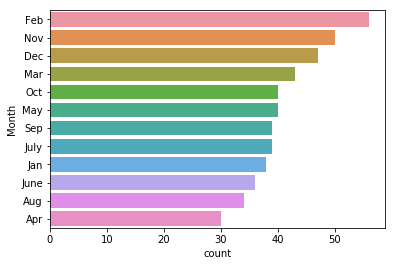

In [43]:
sns.countplot(y="Month",data=data,order=data.Month.value_counts().index)

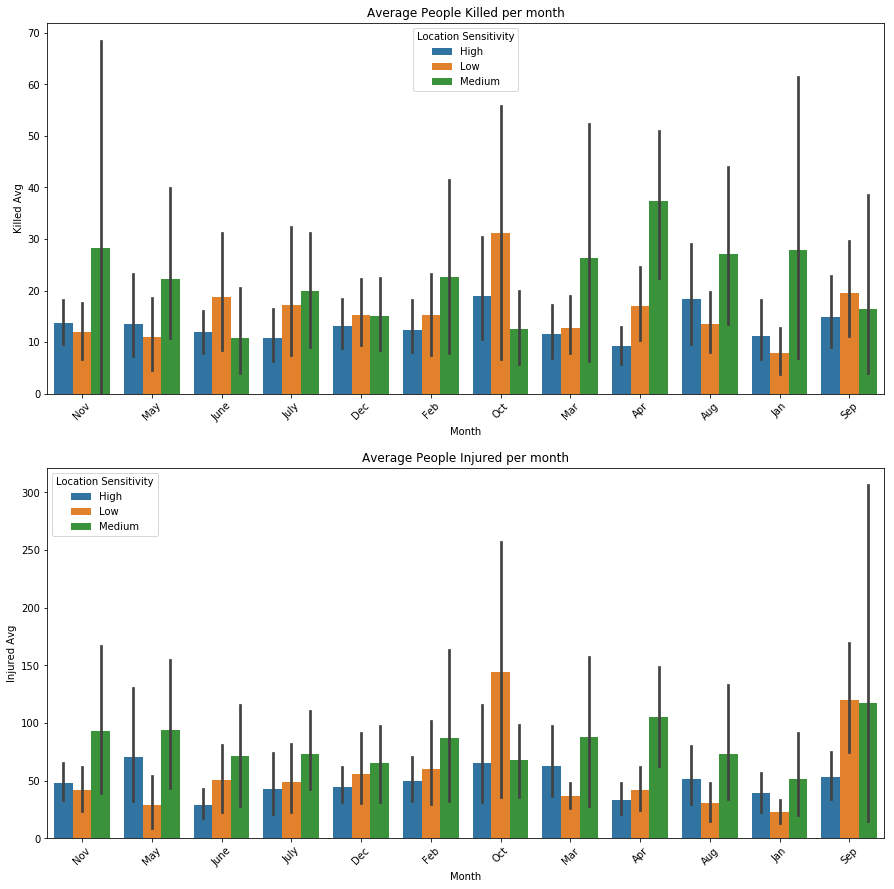

In [44]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
plt.title("Average People Killed per month")
sns.barplot("Month","Killed Avg",hue="Location Sensitivity",data=data)
plt.xticks(rotation=45)
plt.subplot(2,1,2)
plt.title("Average People Injured per month")
sns.barplot("Month","Injured Avg",hue="Location Sensitivity",data=data)
plt.xticks(rotation=45);


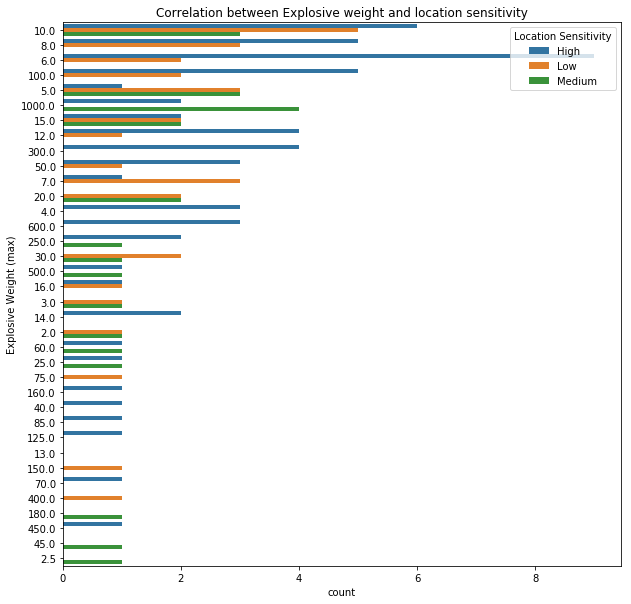

In [45]:
plt.figure(figsize=(10,10))
plt.title("Correlation between Explosive weight and location sensitivity")
sns.countplot(y="Explosive Weight (max)",hue="Location Sensitivity",data=data,order=data["Explosive Weight (max)"].value_counts().index)

**What is the impact of Holiday Type on number of blast victims**

In [46]:
cleaned_holiday=data[pd.notnull(data["Holiday Type"])]

In [47]:
cleaned_holiday["Holiday Type"].isnull().sum()

0

In [48]:
cleaned_Islamic_Date.head()

,Blast Day Type,Holiday Type,Time,City,Latitude,Longitude,Province,Location,Location Category,Location Sensitivity,...,Temperature(F),Day_name,Month,Day,Year,Islamic_Day,Islamic_Month,Islamic_Year,Killed Avg,Injured Avg
0,Holiday,Weekend,NaN,Islamabad,33.7180,73.0718,Capital,Egyptian Embassy,Foreign,High,...,60.503,Sunday,November,19,1995,25,Jumaada-al-THaany,1416,14.5,64.0
1,Working Day,NaN,NaN,Karachi,24.9918,66.9911,Sindh,office of Nawa-e-Waqt,Office Building,Low,...,74.786,Monday,November,6,2000,10,Shaban,1421,10.5,34.5
2,Working Day,NaN,7:45 AM,Karachi,24.9918,66.9911,Sindh,Pakistan Navy bus Parked outside Five Star She...,Hotel,Medium,...,88.628,Wednesday,May,8,2002,25,safar,1423,14.0,50.0
3,Working Day,NaN,11:10:00 AM,Karachi,24.9918,66.9911,Sindh,US Consulate Civil Lines Area,Foreign,High,...,88.574,Friday,June,14,2002,3,Raby`-al-THaany,1423,20.0,74.0
4,Working Day,NaN,NaN,Quetta,30.2095,67.0182,Baluchistan,Imambargah MeCongy Road Quetta,Religious,Medium,...,91.616,Friday,July,4,2003,4,Jamadi-ul-Awal,1424,45.5,90.5


**Most of the people were killed and injured on Friday. May be in friday prayers**

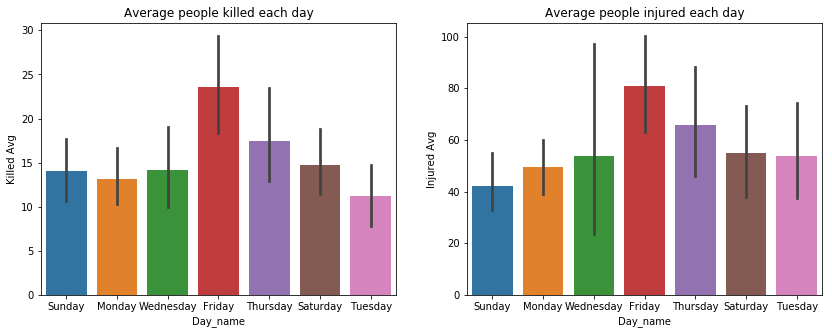

In [49]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.title("Average people killed each day")
sns.barplot("Day_name","Killed Avg",data=cleaned_Islamic_Date)
plt.subplot(1,2,2)
plt.title("Average people injured each day")
sns.barplot("Day_name","Injured Avg",data=cleaned_Islamic_Date);

In [50]:
cleaned_location=data[pd.notnull(data["Location Sensitivity"])]

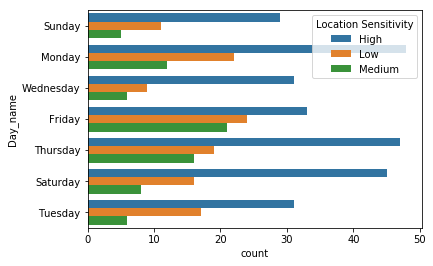

In [51]:
sns.countplot(y="Day_name",hue="Location Sensitivity",data=cleaned_location)

In [52]:
data["City"].unique()

array(['Islamabad', 'Karachi', 'Karachi ', 'Quetta', 'Rawalpindi',
       'North waziristan', 'Kohat', 'Attock ', 'Sialkot', 'Lahore ',
       'Swat', 'Hangu', 'Bannu', 'North Waziristan', 'Lasbela',
       'Malakand ', 'Peshawar', 'Peshawar ', 'D.I Khan ', 'Lakki Marwat',
       'Tank', 'Islamabad ', 'Quetta ', 'Gujrat', 'Charsadda', 'Tank ',
       'Swat ', 'D.I Khan', 'Kohat ', 'Kuram Agency ', 'Shangla ',
       'Bajaur Agency', 'South Waziristan', 'Haripur', 'bannu',
       'karachi ', 'Sargodha', 'Nowshehra', 'Charsadda ',
       'Mohmand agency', 'Dara Adam Khel', 'Khyber Agency', 'Mardan',
       'Bhakkar ', 'Orakzai Agency', 'Mohmand Agency', 'Buner',
       'D.G Khan ', 'Pishin', 'Chakwal ', 'Lahore', 'Upper Dir',
       'Muzaffarabad', 'swat', 'Totalai', 'Multan', 'D.G Khan',
       'Lower Dir', 'Lakki marwat', 'Sudhanoti', 'Khyber Agency ',
       'peshawar', 'Poonch', 'Mansehra', 'Karak', 'Mohmand Agency ',
       'South waziristan', 'lakki marwat', 'Swabi ', 'Dara Adam kh

In [53]:
data["City"]=data.City.str.replace(" ","")
data["City"]=data.City.str.replace("karachi","Karachi")
data["City"]=data.City.str.replace("karachi","Karachi")

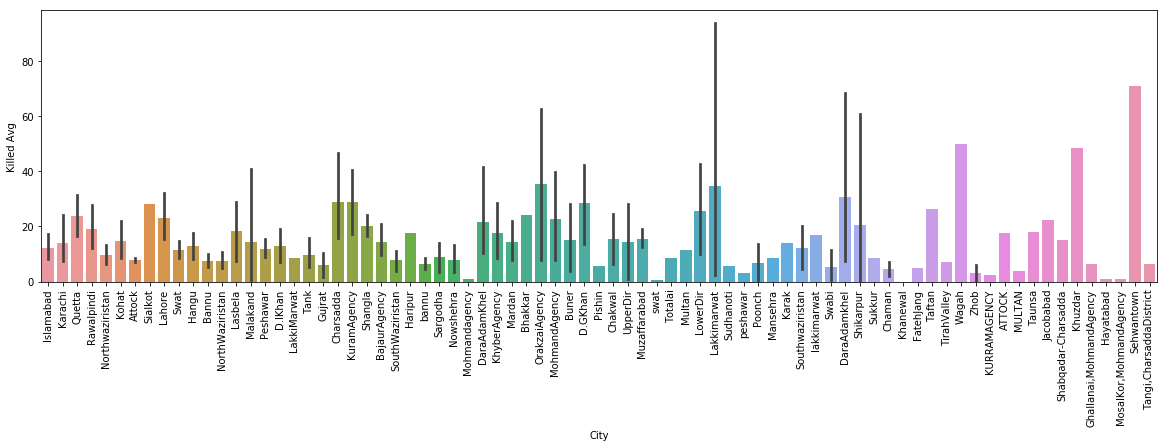

In [54]:
plt.figure(figsize=(20,5))
sns.barplot("City","Killed Avg",data=data)
plt.xticks(rotation=90);

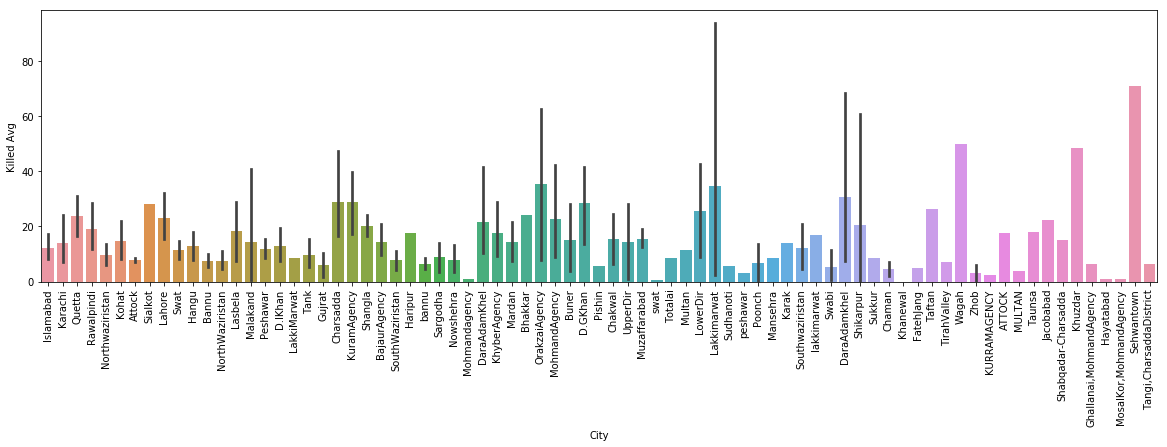

In [55]:
plt.figure(figsize=(20,5))
sns.barplot("City","Killed Avg",data=data)
plt.xticks(rotation=90);

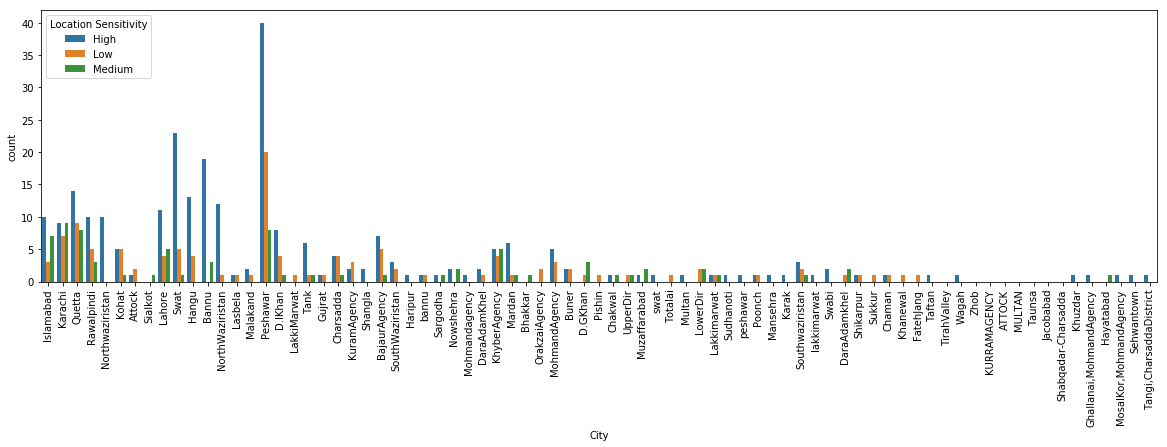

In [56]:
plt.figure(figsize=(20,5))
sns.countplot("City",hue="Location Sensitivity",data=data)
plt.xticks(rotation=90);

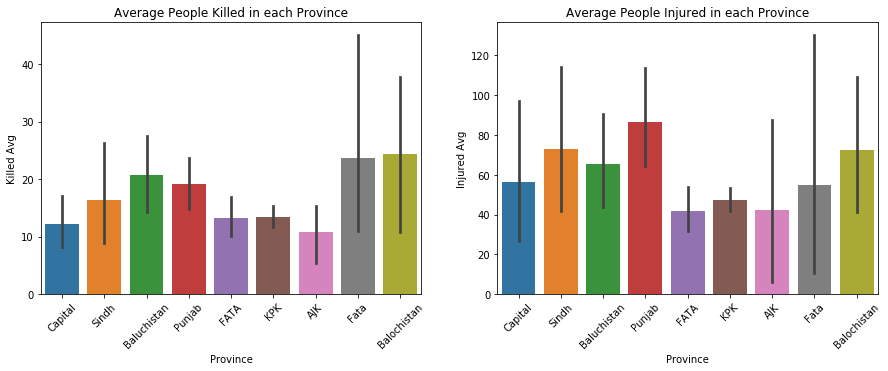

In [57]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.xticks(rotation=45)
plt.title("Average People Killed in each Province")
sns.barplot("Province","Killed Avg",data=data)
plt.subplot(1,2,2)
plt.xticks(rotation=45)
plt.title("Average People Injured in each Province")
sns.barplot("Province","Injured Avg",data=data);

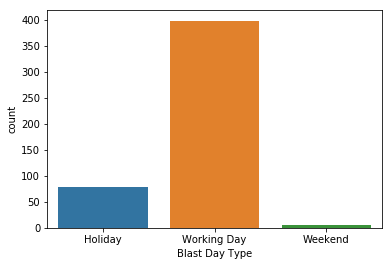

In [58]:
sns.countplot("Blast Day Type",data=data);

In [59]:
data["Open/Closed Space"]=data["Open/Closed Space"].str.replace("open","Open")
data["Open/Closed Space"]=data["Open/Closed Space"].str.replace(" ","")
data["Open/Closed Space"]=data["Open/Closed Space"].str.replace("closed","Closed")

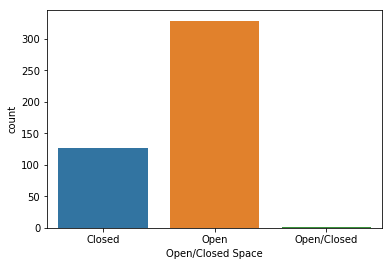

In [60]:
sns.countplot("Open/Closed Space",data=data)

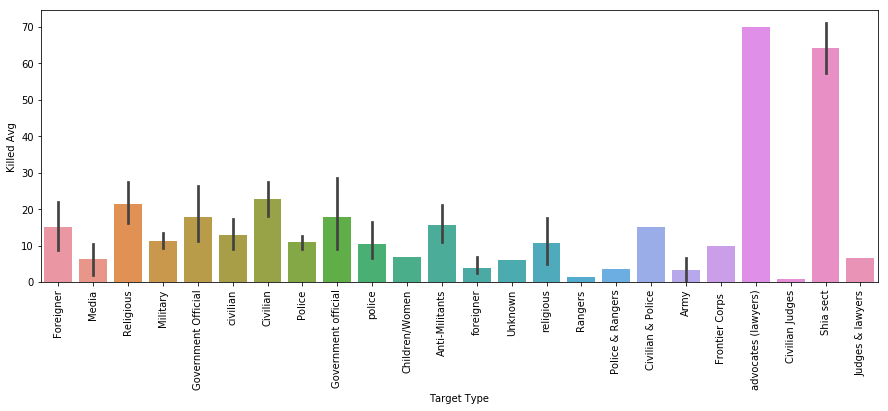

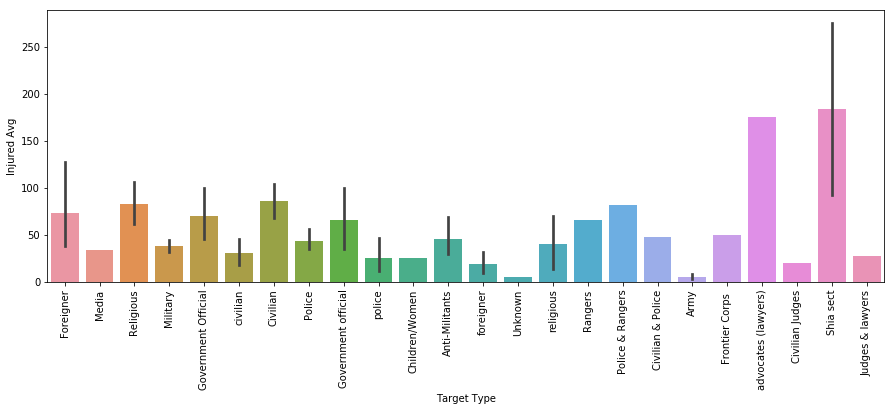

In [61]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.barplot("Target Type","Killed Avg",data=data);
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.barplot("Target Type","Injured Avg",data=data);

In [62]:
data["Longitude"]=data["Longitude"].replace(" ","")
data["Latitude"]=data["Latitude"].replace(" ","")

In [63]:
data["Longitude"]=data["Longitude"].astype(float)
data["Latitude"]=data["Latitude"].astype(float)

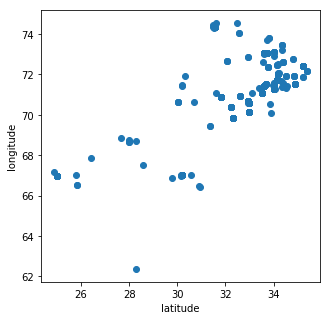

In [64]:
plt.figure(figsize=(5,5))
plt.scatter(x="Latitude",y="Longitude",data=data)
plt.ylabel('longitude')
plt.xlabel('latitude');

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

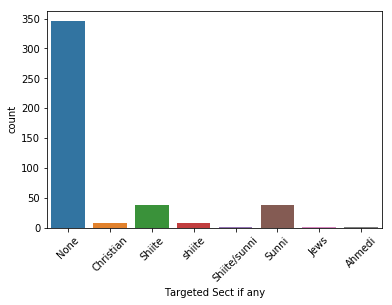

In [65]:
sns.countplot("Targeted Sect if any",data=data)
plt.xticks(rotation=45)

In [66]:
data["Hospital Names"]=data["Hospital Names"].str.extract('([a-zA-Z ]+)', expand=False).str.strip()

In [67]:
data[["Hospital Names","Killed Avg"]].groupby(["Hospital Names"],as_index=False).mean().sort_values(by="Killed Avg",ascending=False)   

,Hospital Names,Killed Avg
132,Near local hospital,94.00
170,pof hospital,85.00
139,Peshwar Hospitals,73.00
50,Civil Hospital and the Combined Military Hospital,73.00
148,Sehwan Taluka Hospital,71.00
74,District Headqurters Hospital,68.50
111,Kohat Dvisional Headquarters Hospital,62.50
56,Combined Miltry Hospital,58.00
155,Tehsil Headquarters hospital Jamrud,53.50
122,Liaquat National Hospital,52.00


In [68]:
data[["Hospital Names","Injured Avg"]].groupby(["Hospital Names"],as_index=False).mean().sort_values(by="Injured Avg",ascending=False)   

,Hospital Names,Injured Avg
140,Poly Clinic,400.000000
137,Parachinar Headquarters Hospital,290.000000
84,Ganga Ram Hospita,287.500000
85,Ganga Ram hospital,278.750000
58,DHQ D,275.000000
56,Combined Miltry Hospital,275.000000
148,Sehwan Taluka Hospital,275.000000
111,Kohat Dvisional Headquarters Hospital,245.000000
50,Civil Hospital and the Combined Military Hospital,234.500000
170,pof hospital,233.500000
